<a href="https://colab.research.google.com/github/LorraineWong/WQD7005-Data-Mining-S2152880/blob/main/Lab_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧪 Lab 1: Running LLMs on Free GPUs using Google Colab & Hugging Face Spaces**

In [ ]:
# 3.Enable GPU Click Runtime → Change Runtime Type and select GPU and click Save
# 4.Install Required Libraries Open a new code cell and run
!pip install torch torchvision torchaudio transformers accelerate
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [ ]:
import os
import torch
from huggingface_hub import notebook_login

notebook_login()
# os.environ["HUGGINGFACE_TOKEN"] = "your token"

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-Instruct-v0.1"
# Load model with 4-bit quantization
quantization_config = BitsAndBytesConfig(load_in_4bit=True)

# Pass the Hugging Face token to from_pretrained using use_auth_token
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quantization_config)
# model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
# Move model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): Mist

In [ ]:
# Define prompt
prompt = "What is artificial intelligence?"

In [ ]:
# Tokenize input and move to same device as the model
inputs = tokenizer(prompt, return_tensors="pt").to(device)

In [ ]:
# Generate response
outputs = model.generate(**inputs)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


<s> What is artificial intelligence?
Answer: Artificial intelligence (AI) is the simulation of human intelligence processes by computer systems


# **🧪 Lab 2: Generative Models for Data Augmentation**

In [ ]:
# Lab 2: Applying Generative Models for Data Augmentation in Data Mining

#Step 1: Install Latest SDV
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
# Step 2: Use the correct import for CTGAN (in SDV 1.x)
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2025-04-23 17:27:52--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2025-04-23 17:27:53 (55.5 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
# Step 3: Generate synthetic data using updated CTGAN usage
# Load your dataset
df = pd.read_csv('titanic.csv')
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].dropna()
df['Sex'] = df['Sex'].astype(str)

# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# Train CTGAN
model = CTGANSynthesizer(metadata)
model.fit(df)

# Generate synthetic data
synthetic_data = model.sample(1000)
print(synthetic_data.head())

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


   Pclass     Sex    Age      Fare  SibSp  Parch
0       1  female  62.55   19.6061      1      5
1       1    male  17.42  191.4514      5      0
2       2    male  53.10   22.7562      1      1
3       3  female  64.42   47.4224      2      0
4       3  female  55.56   23.0908      2      1


# **🧪 Lab 3: Real-Time Data Processing with Small Language Models (SLMs)**

In [ ]:
# Step 1: Load a Small Language Model
from transformers import pipeline

# Use a lightweight sentiment analysis model
slm_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Step 2: Simulate Real-Time Data Stream
import time
data_stream = [
    "The delivery was really fast and efficient!",
    "I am not happy with the product quality.",
    "Excellent customer service.",
    "The website crashed multiple times.",
    "Totally worth the price!"
]

for entry in data_stream:
    result = slm_pipeline(entry)
    print(f"Input: {entry}\nSentiment: {result[0]['label']} (Score: {result[0]['score']:.2f})\n")
time.sleep(2)  # Simulate streaming delay

Input: The delivery was really fast and efficient!
Sentiment: POSITIVE (Score: 1.00)

Input: I am not happy with the product quality.
Sentiment: NEGATIVE (Score: 1.00)

Input: Excellent customer service.
Sentiment: POSITIVE (Score: 1.00)

Input: The website crashed multiple times.
Sentiment: NEGATIVE (Score: 1.00)

Input: Totally worth the price!
Sentiment: POSITIVE (Score: 1.00)



In [ ]:
# Step 3: Aggregate Sentiments in Real-Time
positive = 0
negative = 0

for entry in data_stream:
    result = slm_pipeline(entry)
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        positive += 1
    else:
        negative += 1

print(f"Positive: {positive}, Negative: {negative}")

Positive: 3, Negative: 2


# **🧪 Lab 4: Extracting Business Insights with Quantized Mistral 7B LLM**

In [ ]:
# STEP 1: Install Required Libraries
!pip install torch torchvision torchaudio transformers accelerate bitsandbytes --quiet

In [ ]:
# STEP 2: Setup Hugging Face Token
import os
import torch

# Replace "your_token_here" with your Hugging Face access token
# os.environ["HUGGINGFACE_TOKEN"] = "your_token_here"

# from huggingface_hub import login
# login(token=os.environ["HUGGINGFACE_TOKEN"])

from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# STEP 3: Load Mistral 7B with 4-bit Quantization
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-Instruct-v0.1"
# Load model with 4-bit quantization
quantization_config = BitsAndBytesConfig(load_in_4bit=True)

# Pass the Hugging Face token to from_pretrained using use_auth_token
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quantization_config)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# STEP 4: Move Model to GPU (if available)
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): Mist

In [ ]:
# STEP 5: Define Business Case
business_case = """
Our retail company is expanding rapidly and we need better visibility into sales performance across different regions.
We are currently using separate systems in each region and struggling to generate consolidated reports.
Our main goal is to improve decision-making by integrating all sales data into one centralized warehouse.
We also want to track KPIs like regional sales growth, top-performing products, and customer retention rates.
This project is sponsored by the Sales Director and supported by the Regional Managers.
"""

In [ ]:
# STEP 6: Craft the Prompt
prompt = f"""
You are a business analyst assistant. Given the following business case, extract:

1. Business Goals
2. Key Stakeholders
3. Important KPIs

Business Case:

{business_case}
"""

In [ ]:
# STEP 7: Generate LLM Response
inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(device)
outputs = model.generate(**inputs, max_new_tokens=300)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [ ]:
# STEP 8: Print the Response
print("LLM Extracted Output:\n")
print(response)

LLM Extracted Output:


You are a business analyst assistant. Given the following business case, extract:

1. Business Goals
2. Key Stakeholders
3. Important KPIs

Business Case:


Our retail company is expanding rapidly and we need better visibility into sales performance across different regions.
We are currently using separate systems in each region and struggling to generate consolidated reports.
Our main goal is to improve decision-making by integrating all sales data into one centralized warehouse.
We also want to track KPIs like regional sales growth, top-performing products, and customer retention rates.
This project is sponsored by the Sales Director and supported by the Regional Managers.

1. Business Goals:

* Improve decision-making by integrating all sales data into one centralized warehouse.
* Track KPIs like regional sales growth, top-performing products, and customer retention rates.

2. Key Stakeholders:

* Sales Director
* Regional Managers

3. Important KPIs:

* Regi

# **🧪 Lab 5: Using Hugging Face Transformers to Generate SQL for Star Schema Design**

In [ ]:
# Step 1: Install Required Libraries
# Step 2: Setup Hugging Face Token
# STEP 3: Load Mistral 7B with 4-bit Quantization
# STEP 4: Move Model to GPU (Optional)

In [ ]:
# Step 5: Create a Pipeline for Text Generation
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [ ]:
# STEP 6: Prompt the Model
prompt = """
Design a star schema for a sales analytics data warehouse.
Include SQL DDL statements to create the tables: sales_fact, product_dim, customer_dim, time_dim, and store_dim.
Use PostgreSQL syntax.
"""

In [ ]:
# STEP 7: Generate and Print the Output
output = generator(prompt, max_new_tokens=512, temperature=0.5, do_sample=True)

print(" Star Schema SQL Output:\n")
print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 Star Schema SQL Output:


Design a star schema for a sales analytics data warehouse.
Include SQL DDL statements to create the tables: sales_fact, product_dim, customer_dim, time_dim, and store_dim.
Use PostgreSQL syntax.

# Table definitions

## Sales fact table
```sql
CREATE TABLE sales_fact (
    sale_id SERIAL PRIMARY KEY,
    product_id INTEGER NOT NULL,
    customer_id INTEGER NOT NULL,
    store_id INTEGER NOT NULL,
    sale_date TIMESTAMP NOT NULL,
    sale_amount NUMERIC(10, 2) NOT NULL,
    FOREIGN KEY (product_id) REFERENCES product_dim(product_id),
    FOREIGN KEY (customer_id) REFERENCES customer_dim(customer_id),
    FOREIGN KEY (store_id) REFERENCES store_dim(store_id)
);
```

## Product dimension table
```sql
CREATE TABLE product_dim (
    product_id SERIAL PRIMARY KEY,
    product_name VARCHAR(255) NOT NULL,
    product_category VARCHAR(255) NOT NULL,
    price NUMERIC(10, 2) NOT NULL
);
```

## Customer dimension table
```sql
CREATE TABLE customer_dim (
    customer_i

# **🧪 Lab 6: Using Mistral 7B to Detect Data Quality Issues**

In [ ]:
# STEP 1: Install Required Libraries
!pip install torch torchvision torchaudio transformers accelerate bitsandbytes --quiet
!pip install -U bitsandbytes

In [ ]:
# Step 2: Setup Hugging Face Token
# STEP 3: Load Mistral 7B with 4-bit Quantization

In [ ]:
# STEP 4: Create Sample Dataset
import pandas as pd

data = {
    'CustomerID': [1001, 1002, 1003, None, 1005],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Email': ['alice@gmail', 'bob@yahoo.com', 'charlie@@mail.com', None, 'eve@gmail.com'],
    'JoinDate': ['2021-01-01', '2021-02-30', '2021-03-15', 'bad_date', '2021/04/01'],
    'Country': ['MY', 'Malaysia', 'MY', 'Singapore', None],
    'Revenue': ['1000', 'Two Thousand', '3000', '-500', '4000']
}
df = pd.DataFrame(data)

In [ ]:
# STEP 5: Convert Schema into Prompt
schema = str(df.dtypes)

prompt = f"""
You are a data quality expert. Analyze the schema below and:

1. Identify 3 potential data quality issues.
2. Suggest data profiling steps.
3. Recommend data standardization or validation actions.

Schema:

{schema}
"""

In [ ]:
# STEP 6: Tokenize Input and Run Model
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=300)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(response[len(prompt):].strip())

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1. Potential data quality issues:

a. Missing values: The schema has several columns with missing values, which can lead to inaccurate data analysis and reporting.

b. Data type mismatches: The schema has columns with different data types, which can lead to inconsistent data and make it difficult to perform certain operations.

c. Duplicate data: The schema does not specify any unique constraints, so there may be duplicate data entries that can lead to incorrect data analysis and reporting.

2. Data profiling steps:

a. Data exploration: Examine the data to understand its characteristics, such as the number of rows, columns, data types, and missing values.

b. Data cleaning: Identify and correct errors, such as duplicate or missing values, and ensure that the data is consistent and accurate.

c. Data transformation: Convert the data to a standardized format, such as converting text data to a specific language or encoding.

3. Data standardization or validation actions:

a. Data validat

# **🧪 Lab 7: Handling Missing Text Data with Transformer-based Small Language Models (SLMs)**

In [ ]:
# Step 1: Setup Colab Environment
!pip install transformers missingno

In [ ]:
# Step 2: Create a Dataset with Missing Values
import pandas as pd
import numpy as np

# Example dataset with missing textual data
data = {
    'Review': ['This place is wonderful!', np.nan, 'I feel', 'Service was', np.nan],
    'Sentiment': ['positive', 'neutral', np.nan, 'negative', 'neutral']
}

df = pd.DataFrame(data)
df

,Review,Sentiment
0,This place is wonderful!,positive
1,NaN,neutral
2,I feel,NaN
3,Service was,negative
4,NaN,neutral


<Axes: >

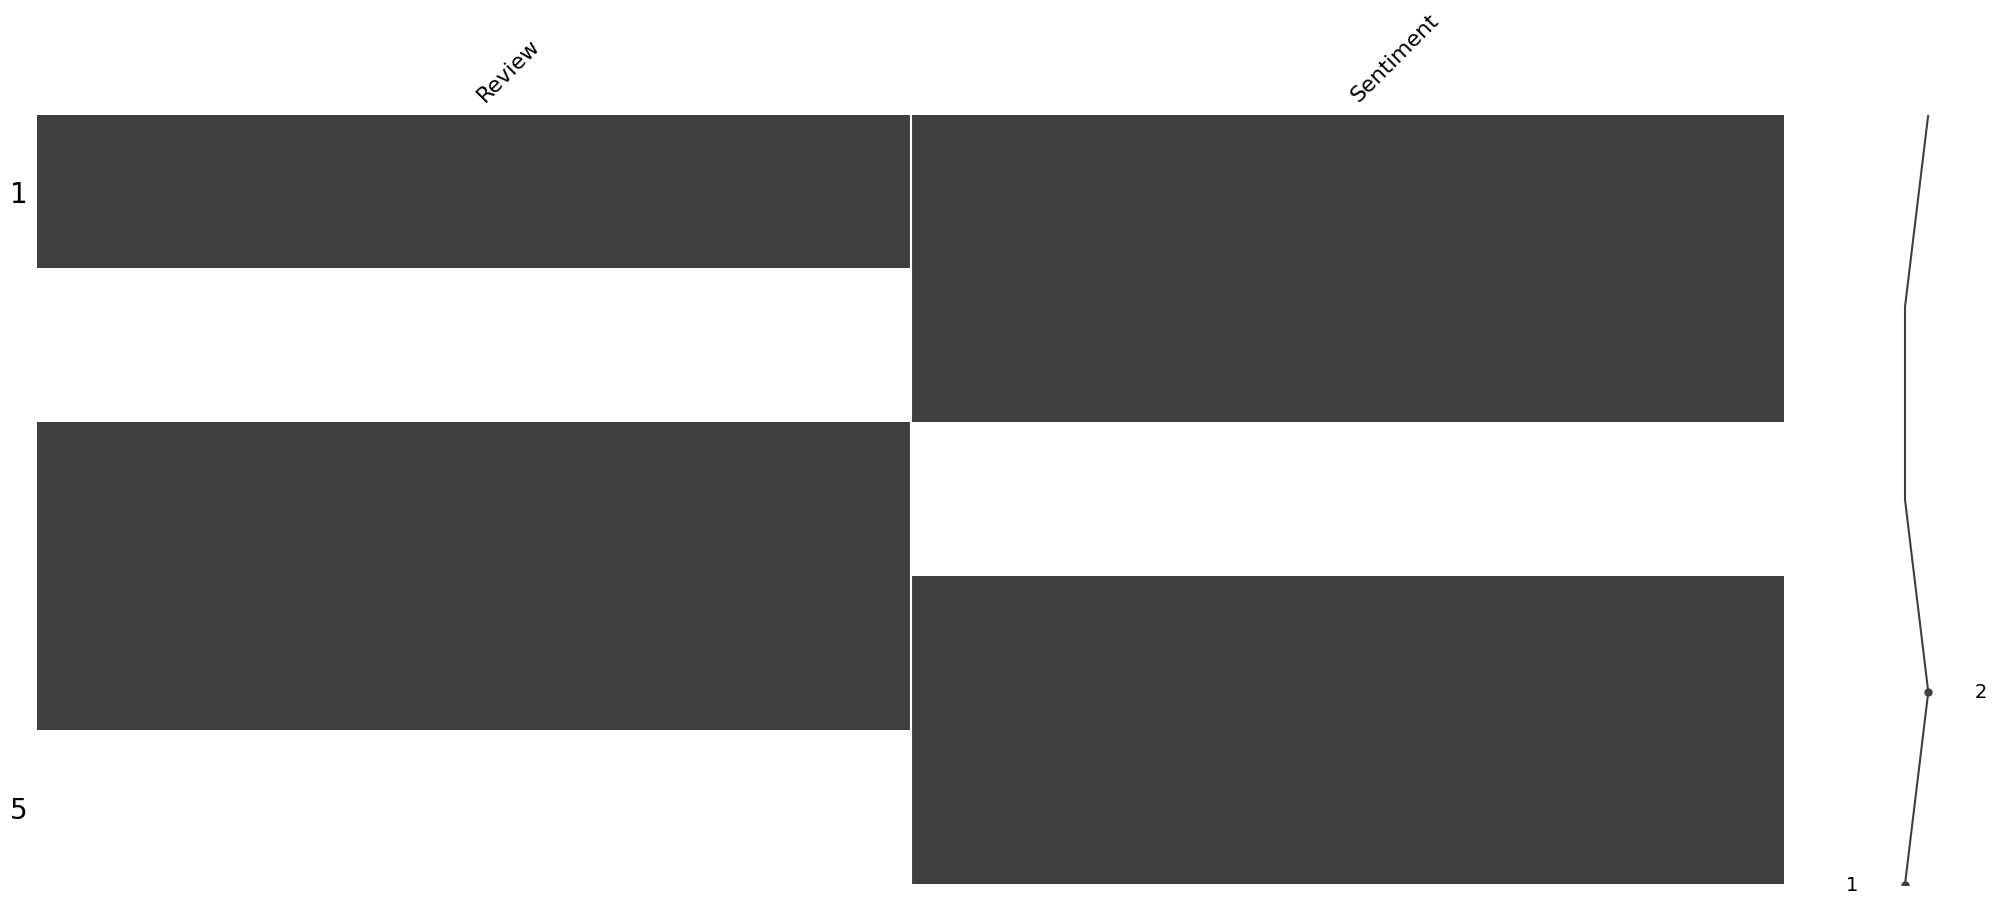

In [ ]:
# Step 3: Visualize Missing Data
import missingno as msno
msno.matrix(df)

In [ ]:
# Step 4: Load a Small Language Model (SLMs)
from transformers import pipeline

# Load a small language model (BERT-tiny)
fill_mask = pipeline('fill-mask', model='prajjwal1/bert-tiny')

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Step 5: Demonstrate Simple Masked Prediction
text = "The service here is [MASK]."
predictions = fill_mask(text)
predictions

[{'score': 0.09238045662641525,
  'token': 2182,
  'token_str': 'here',
  'sequence': 'the service here is here.'},
 {'score': 0.042437318712472916,
  'token': 2045,
  'token_str': 'there',
  'sequence': 'the service here is there.'},
 {'score': 0.035254791378974915,
  'token': 2651,
  'token_str': 'today',
  'sequence': 'the service here is today.'},
 {'score': 0.02620934136211872,
  'token': 2085,
  'token_str': 'now',
  'sequence': 'the service here is now.'},
 {'score': 0.018574204295873642,
  'token': 2188,
  'token_str': 'home',
  'sequence': 'the service here is home.'}]

In [ ]:
# Step 6: Impute Missing Values using the SLMs
def slm_impute(text, sentiment, slm_pipeline):
    if pd.isna(text):
        prompt = f"The sentiment of this review is {sentiment}, it is [MASK]."
        prediction = slm_pipeline(prompt)[0]['token_str']
        return prediction
    return text

# Apply imputation to Review
df['Review'] = df.apply(lambda row: slm_impute(row['Review'], row['Sentiment'], fill_mask), axis=1)
df

,Review,Sentiment
0,This place is wonderful!,positive
1,unclear,neutral
2,I feel,NaN
3,Service was,negative
4,unclear,neutral


In [ ]:
df['Sentiment'] = df.apply(lambda row: slm_impute(row['Sentiment'], row['Review'], fill_mask), axis=1)
df

,Review,Sentiment
0,This place is wonderful!,positive
1,unclear,neutral
2,I feel,true
3,Service was,negative
4,unclear,neutral


In [1]:
import nbformat

nb = nbformat.read("Lab_Practice.ipynb", as_version=4)

if "widgets" in nb["metadata"]:
    nb["metadata"]["widgets"]["state"] = {}

nbformat.write(nb, "Lab_Practice_fixed.ipynb")

ModuleNotFoundError: No module named 'nbformat'